<a href="https://colab.research.google.com/github/Theivaprakasham/Projects/blob/main/1D%20CNN%20MIT-BIH%20ECG%20classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi

Mon Apr 12 07:18:02 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.67       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   51C    P0    32W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

**Theivaprakasham H - CB.EN.P2CEN20026**

*1. Build the given CNN model for the dataset “MIT-BIH” ECG dataset for classification contianing 5 classes.*

In [ ]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Flatten, Dense, Conv1D, MaxPool1D, Dropout
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

# Method 1:Spiliting the dataset from scratch

In [ ]:
df = pd.read_csv('/content/mitbih_train.csv', header=None)

In [ ]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,0.044118,0.061275,0.066176,0.061275,0.049020,0.073529,0.061275,0.061275,0.066176,0.068627,0.095588,0.075980,0.093137,0.105392,0.115196,0.102941,0.117647,0.125000,0.142157,0.127451,0.151961,0.144608,0.164216,0.144608,0.159314,0.151961,0.154412,0.142157,0.151961,0.151961,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,0.074074,0.062678,0.065527,0.065527,0.062678,0.076923,0.071225,0.082621,0.091168,0.096866,0.082621,0.082621,0.091168,0.105413,0.122507,0.148148,0.182336,0.193732,0.213675,0.207977,0.222222,0.253561,0.270655,0.287749,0.284900,0.293447,0.256410,0.247863,0.188034,0.145299,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,0.056757,0.043243,0.067568,0.062162,0.078378,0.072973,0.086486,0.081081,0.108108,0.110811,0.135135,0.135135,0.170270,0.183784,0.216216,0.237838,0.270270,0.286486,0.316216,0.318919,0.332432,0.297297,0.267568,0.216216,0.189189,0.132432,0.118919,0.064865,0.064865,0.043243,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,0.063536,0.082873,0.085635,0.093923,0.113260,0.124309,0.140884,0.132597,0.140884,0.091160,0.085635,0.074586,0.071823,0.080110,0.096685,0.118785,0.138122,0.140884,0.138122,0.146409,0.110497,0.102210,0.060773,0.027624,0.038674,0.013812,0.011050,0.013812,0.033149,0.005525,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,0.131455,0.122066,0.140845,0.159624,0.150235,0.145540,0.136150,0.169014,0.178404,0.173709,0.183099,0.201878,0.187793,0.164319,0.187793,0.215962,0.215962,0.201878,0.211268,0.230047,0.215962,0.230047,0.239437,0.267606,0.253521,0.230047,0.220657,0.225352,0.211268,0.173709,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#Unique Number of classes in the Dataset
df[187].unique()

array([0., 1., 2., 3., 4.])

In [ ]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,0.044118,0.061275,0.066176,0.061275,0.049020,0.073529,0.061275,0.061275,0.066176,0.068627,0.095588,0.075980,0.093137,0.105392,0.115196,0.102941,0.117647,0.125000,0.142157,0.127451,0.151961,0.144608,0.164216,0.144608,0.159314,0.151961,0.154412,0.142157,0.151961,0.151961,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,0.074074,0.062678,0.065527,0.065527,0.062678,0.076923,0.071225,0.082621,0.091168,0.096866,0.082621,0.082621,0.091168,0.105413,0.122507,0.148148,0.182336,0.193732,0.213675,0.207977,0.222222,0.253561,0.270655,0.287749,0.284900,0.293447,0.256410,0.247863,0.188034,0.145299,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,0.056757,0.043243,0.067568,0.062162,0.078378,0.072973,0.086486,0.081081,0.108108,0.110811,0.135135,0.135135,0.170270,0.183784,0.216216,0.237838,0.270270,0.286486,0.316216,0.318919,0.332432,0.297297,0.267568,0.216216,0.189189,0.132432,0.118919,0.064865,0.064865,0.043243,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,0.063536,0.082873,0.085635,0.093923,0.113260,0.124309,0.140884,0.132597,0.140884,0.091160,0.085635,0.074586,0.071823,0.080110,0.096685,0.118785,0.138122,0.140884,0.138122,0.146409,0.110497,0.102210,0.060773,0.027624,0.038674,0.013812,0.011050,0.013812,0.033149,0.005525,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,0.131455,0.122066,0.140845,0.159624,0.150235,0.145540,0.136150,0.169014,0.178404,0.173709,0.183099,0.201878,0.187793,0.164319,0.187793,0.215962,0.215962,0.201878,0.211268,0.230047,0.215962,0.230047,0.239437,0.267606,0.253521,0.230047,0.220657,0.225352,0.211268,0.173709,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,0.044118,0.061275,0.066176,0.061275,0.049020,0.073529,0.061275,0.061275,0.066176,0.068627,0.095588,0.075980,0.093137,0.105392,0.115196,0.102941,0.117647,0.125000,0.142157,0.127451,0.151961,0.144608,0.164216,0.144608,0.159314,0.151961,0.154412,0.142157,0.151961,0.151961,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,0.074074,0.062678,0.065527,0.065527,0.062678,0.076923,0.071225,0.082621,0.091168,0.096866,0.082621,0.082621,0.091168,0.105413,0.122507,0.148148,0.182336,0.193732,0.213675,0.207977,0.222222,0.253561,0.270655,0.287749,0.284900,0.293447,0.256410,0.247863,0.188034,0.145299,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,0.056757,0.043243,0.067568,0.062162,0.078378,0.072973,0.086486,0.081081,0.108108,0.110811,0.135135,0.135135,0.170270,0.183784,0.216216,0.237838,0.270270,0.286486,0.316216,0.318919,0.332432,0.297297,0.267568,0.216216,0.189189,0.132432,0.118919,0.064865,0.064865,0.043243,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,0.063536,0.082873,0.085635,0.093923,0.113260,0.124309,0.140884,0.132597,0.140884,0.091160,0.085635,0.074586,0.071823,0.080110,0.096685,0.118785,0.138122,0.140884,0.138122,0.146409,0.110497,0.102210,0.060773,0.027624,0.038674,0.013812,0.011050,0.013812,0.033149,0.005525,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,0.131455,0.122066,0.140845,0.159624,0.150235,0.145540,0.136150,0.169014,0.178404,0.173709,0.183099,0.201878,0.187793,0.164319,0.187793,0.215962,0.215962,0.201878,0.211268,0.230047,0.215962,0.230047,0.239437,0.267606,0.253521,0.230047,0.220657,0.225352,0.211268,0.173709,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87549,0.807018,0.494737,0.536842,0.529825,0.491228,0.484211,0.456140,0.396491,0.284211,0.136842,0.052632,0.140351,0.119298,0.091228,0.140351,0.161404,0.105263,0.143860,0.143860,0.129825,0.147368,0.157895,0.164912,0.168421,0.154386,0.175439,0.164912,0.154386,0.182456,0.192982,0.196491,0.207018,0.217544,0.217544,0.256140,0.284211,0.294737,0.301754,0.301754,0.322807,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87550,0.718333,0.605000,0.486667,0.361667,0.231667,0.120000,0.051667,0.001667,0.000000,0.013333,0.078333,0.183333,0.275000,0.315000,0.361667,0.430000,0.481667,0.526667,0.543333,0.563333,0.581667,0.588333,0.600000,0.603333,0.613333,0.6216

Display the following:
1. One sample data from each class.      ( 5 marks)


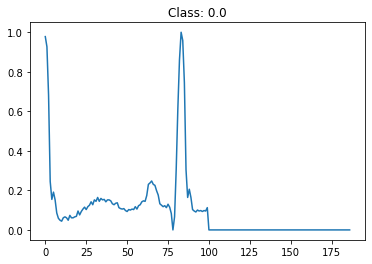

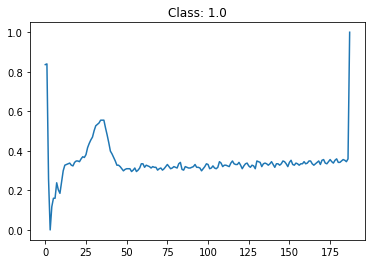

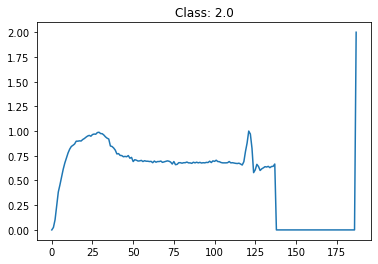

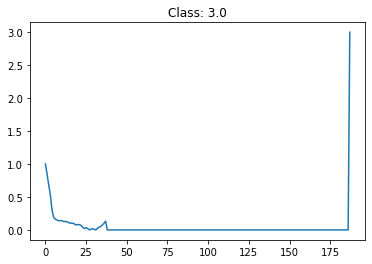

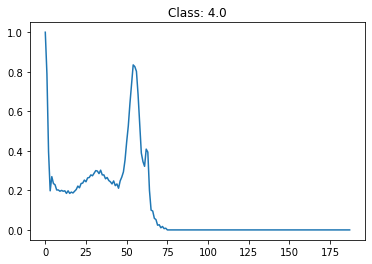

In [ ]:
#Plot for Class 0
plt.plot(data.iloc[0,:])
plt.title(f'Class: {data.iloc[0,-1]}')
plt.show()


#Plot for Class 1
plt.plot(df.iloc[74088,:])
plt.title(f'Class: {df.iloc[74088,-1]}')
plt.show()

#Plot for Class 2
plt.plot(df.iloc[78223,:])
plt.title(f'Class: {df.iloc[78223,-1]}')
plt.show()


#Plot for Class 3
plt.plot(df.iloc[80512,:])
plt.title(f'Class: {df.iloc[80512,-1]}')
plt.show()

#Plot for Class 4
plt.plot(df.iloc[7547,:])
plt.title(f'Class: {df.iloc[87547,-1]}')
plt.show()

In [ ]:
#Spiliting the Dataset as 80% Train data and 20% Validation data
train, val = train_test_split(df, test_size=0.2)
print(len(train), 'train examples')
print(len(val), 'validation examples')

70043 train examples
17511 validation examples


In [ ]:
train

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187
60366,0.993958,0.969788,0.480363,0.114804,0.129909,0.126888,0.090634,0.081571,0.063444,0.063444,0.039275,0.045317,0.030211,0.042296,0.030211,0.048338,0.036254,0.045317,0.036254,0.051360,0.048338,0.081571,0.084592,0.102719,0.111782,0.120846,0.123867,0.151057,0.148036,0.172205,0.169184,0.199396,0.193353,0.205438,0.187311,0.193353,0.172205,0.172205,0.148036,0.151057,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75896,0.000000,0.147541,0.288525,0.436066,0.593443,0.639344,0.675410,0.704918,0.714754,0.744262,0.747541,0.767213,0.786885,0.793443,0.809836,0.822951,0.839344,0.859016,0.881967,0.918033,0.934426,0.947541,0.947541,0.960656,0.977049,0.996721,1.000000,0.986885,0.977049,0.947541,0.924590,0.895082,0.859016,0.849180,0.800000,0.783607,0.763934,0.747541,0.734426,0.724590,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
48899,0.965742,0.926591,0.564437,0.171289,0.168026,0.200653,0.176183,0.163132,0.164763,0.171289,0.169657,0.161501,0.151713,0.148450,0.143556,0.146819,0.153344,0.140294,0.125612,0.117455,0.114192,0.114192,0.091354,0.081566,0.075041,0.063622,0.047308,0.030995,0.024470,0.021207,0.011419,0.000000,0.009788,0.024470,0.047308,0.068515,0.096248,0.130506,0.148450,0.174551,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
47324,0.949622,0.768262,0.161209,0.012594,0.002519,0.035264,0.015113,0.000000,0.012594,0.017632,0.017632,0.025189,0.022670,0.025189,0.037783,0.045340,0.045340,0.045340,0.065491,0.080605,0.078086,0.108312,0.128463,0.186398,0.186398,0.209068,0.231738,0.234257,0.209068,0.193955,0.163728,0.130982,0.100756,0.070529,0.055416,0.055416,0.055416,0.042821,0.035264,0.040302,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14203,1.000000,0.927536,0.618357,0.159420,0.120773,0.173913,0.094203,0.072464,0.070048,0.060386,0.065217,0.079710,0.077295,0.074879,0.070048,0.084541,0.079710,0.077295,0.067633,0.089372,0.077295,0.079710,0.070048,0.091787,0.089372,0.082126,0.094203,0.113527,0.125604,0.132850,0.115942,0.149758,0.147343,0.147343,0.147343,0.161836,0.157005,0.154589,0.135266,0.157005,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7764,0.920424,0.708223,0.511936,0.297082,0.180371,0.053050,0.018568,0.018568,0.000000,0.015915,0.021220,0.018568,0.034483,0.018568,0.037135,0.047745,0.066313,0.055703,0.076923,0.071618,0.068966,0.053050,0.063660,0.076923,0.090186,0.103448,0.116711,0.143236,0.156499,0.180371,0.222812,0.233422,0.254642,0.233422,0.233422,0.230769,0.209549,0.209549,0.183024,0.177719,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2281,1.000000,0.764706,0.259635,0.210953,0.225152,0.241379,0.241379,0.225152,0.241379,0.225152,0.243408,0.237323,0.249493,0.237323,0.253550,0.251521,0.265720,0.261663,0.281947,0.281947,0.304260,0.306288,0.334686,0.3468

In [ ]:
#Spiliting Train and Valid Labels from Data frame

x_train, y_train = train[range(0,186)], train[187]
x_val, y_val = val[range(0,186)], val[187]

In [ ]:
#One-hot Encoding
train_target = tf.one_hot(y_train, 5)  # output: [5 x 5]
test_target = tf.one_hot(y_val, 5)  # output: [5 x 5]

In [ ]:
#Reshape train and test data to (n_samples, 186, 1), where each sample is of size (186, 1)
X_train = np.array(x_train).reshape(x_train.shape[0], x_train.shape[1], 1)
X_test = np.array(x_val).reshape(x_val.shape[0], x_val.shape[1], 1)

print("Train shape: ", X_train.shape)
print("Test shape: ", X_test.shape)

Train shape:  (70043, 186, 1)
Test shape:  (17511, 186, 1)


In [ ]:
#Model Building
model = tf.keras.Sequential([
    Conv1D(filters=32, kernel_size=(5,), padding='same', activation='relu', input_shape = (X_train.shape[1],1)),
    Conv1D(filters=64, kernel_size=(5,), padding='same', activation='relu'),
    MaxPool1D(pool_size=(2,), strides=2, padding='same'),
    Conv1D(filters=128, kernel_size=(3,), padding='same', activation='relu'),
    Conv1D(filters=256, kernel_size=(3,), padding='same', activation='relu'),
    MaxPool1D(pool_size=(2,), strides=2, padding='same'),
    Flatten(),
    Dense(units = 1024, activation='relu'),
    Dense(units = 256, activation='relu'),
    Dense(units = 32, activation='relu'),
    Dense(units = 5, activation='softmax')
])

In [ ]:
#No of Parameters
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_4 (Conv1D)            (None, 186, 32)           192       
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 186, 64)           10304     
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 93, 64)            0         
_________________________________________________________________
conv1d_6 (Conv1D)            (None, 93, 128)           24704     
_________________________________________________________________
conv1d_7 (Conv1D)            (None, 93, 256)           98560     
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 47, 256)           0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 12032)            

In [ ]:
#Compiing the Model
model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#Fiiting the model for Training and Validation accuracy
history = model.fit(X_train, train_target, validation_data= (X_test, test_target), epochs = 5)

Epoch 1/5
2189/2189 [==============================] - 31s 7ms/step - loss: 0.2507 - accuracy: 0.9312 - val_loss: 0.1122 - val_accuracy: 0.9667
Epoch 2/5
2189/2189 [==============================] - 15s 7ms/step - loss: 0.0853 - accuracy: 0.9759 - val_loss: 0.0933 - val_accuracy: 0.9740
Epoch 3/5
2189/2189 [==============================] - 15s 7ms/step - loss: 0.0560 - accuracy: 0.9837 - val_loss: 0.0613 - val_accuracy: 0.9833
Epoch 4/5
2189/2189 [==============================] - 15s 7ms/step - loss: 0.0421 - accuracy: 0.9873 - val_loss: 0.0710 - val_accuracy: 0.9804
Epoch 5/5
2189/2189 [==============================] - 15s 7ms/step - loss: 0.0367 - accuracy: 0.9886 - val_loss: 0.0703 - val_accuracy: 0.9840


# Method 2: Using Inbuilt Validation Data spilit of Tensorflow Function

In [ ]:
df = pd.read_csv('/content/mitbih_train.csv', header=None)

In [ ]:
#Spiliting X and Y data
x, y = df[range(0,186)], df[187]

In [ ]:
#Reshape train and test data to (n_samples, 186, 1), where each sample is of size (186, 1)
X = np.array(x).reshape(x.shape[0], x.shape[1], 1)

In [ ]:
#One hot encoding
Y = tf.one_hot(y, 5)

In [ ]:
#Model Building
model = tf.keras.Sequential([
    Conv1D(filters=32, kernel_size=(5,), padding='same', activation='relu', input_shape = (X_train.shape[1],1)),
    Conv1D(filters=64, kernel_size=(5,), padding='same', activation='relu'),
    MaxPool1D(pool_size=(2,), strides=2, padding='same'),
    Conv1D(filters=128, kernel_size=(3,), padding='same', activation='relu'),
    Conv1D(filters=256, kernel_size=(3,), padding='same', activation='relu'),
    MaxPool1D(pool_size=(2,), strides=2, padding='same'),
    Flatten(),
    Dense(units = 1024, activation='relu'),
    Dense(units = 256, activation='relu'),
    Dense(units = 32, activation='relu'),
    Dense(units = 5, activation='softmax')
])

In [ ]:
#Compiling the model and Dispalying the Model Summary with learnable parameters
model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_8 (Conv1D)            (None, 186, 32)           192       
_________________________________________________________________
conv1d_9 (Conv1D)            (None, 186, 64)           10304     
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 93, 64)            0         
_________________________________________________________________
conv1d_10 (Conv1D)           (None, 93, 128)           24704     
_________________________________________________________________
conv1d_11 (Conv1D)           (None, 93, 256)           98560     
_________________________________________________________________
max_pooling1d_5 (MaxPooling1 (None, 47, 256)           0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 12032)            

In [ ]:
#Fiiting the model for Training and Validation accuracy
history = model.fit(X_train, train_target, validation_split=0.2 , epochs = 5)

Epoch 1/5
1752/1752 [==============================] - 13s 7ms/step - loss: 0.2582 - accuracy: 0.9289 - val_loss: 0.0926 - val_accuracy: 0.9722
Epoch 2/5
1752/1752 [==============================] - 12s 7ms/step - loss: 0.0879 - accuracy: 0.9741 - val_loss: 0.0757 - val_accuracy: 0.9799
Epoch 3/5
1752/1752 [==============================] - 12s 7ms/step - loss: 0.0613 - accuracy: 0.9813 - val_loss: 0.0608 - val_accuracy: 0.9831
Epoch 4/5
1752/1752 [==============================] - 12s 7ms/step - loss: 0.0458 - accuracy: 0.9853 - val_loss: 0.0546 - val_accuracy: 0.9860
Epoch 5/5
1752/1752 [==============================] - 12s 7ms/step - loss: 0.0315 - accuracy: 0.9901 - val_loss: 0.0632 - val_accuracy: 0.9846
